Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


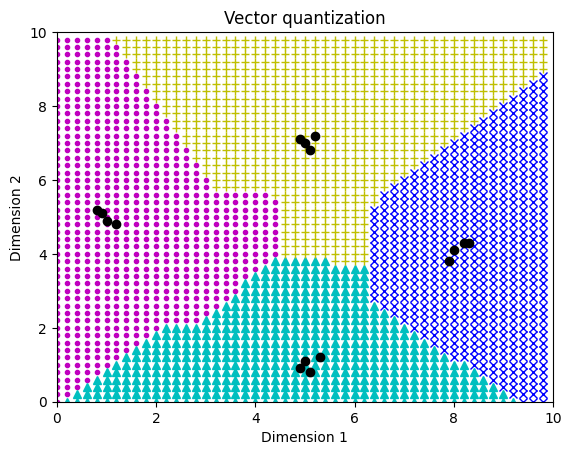

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl 
%matplotlib inline

text = np.loadtxt('data_vector_quantization.txt') 
data = text[:, 0:2] 
labels = text[:, 2:] 

num_input_neurons = 10 
num_output_neurons = 4 
weights = [1/num_output_neurons] * num_output_neurons 
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights) 

nn.train(data, labels, epochs=500, goal=-1) 

xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2)) 
xx = xx.reshape(-1, 1) 
yy = yy.reshape(-1, 1) 
grid_xy = np.hstack([xx, yy])

grid_eval = nn.sim(grid_xy) 

grid_1 = grid_xy[grid_eval[:,0] == 1] 
grid_2 = grid_xy[grid_eval[:,1] == 1] 
grid_3 = grid_xy[grid_eval[:,2] == 1] 
grid_4 = grid_xy[grid_eval[:,3] == 1] 

plt.plot(grid_1[:,0], grid_1[:,1], 'm.', 
         grid_2[:,0], grid_2[:,1], 'bx', 
         grid_3[:,0], grid_3[:,1], 'c^', 
         grid_4[:,0], grid_4[:,1], 'y+') 

class_1 = data[labels[:,0] == 1] 
class_2 = data[labels[:,1] == 1] 
class_3 = data[labels[:,2] == 1] 
class_4 = data[labels[:,3] == 1] 

plt.plot(class_1[:,0], class_1[:,1], 'ko', 
         class_2[:,0], class_2[:,1], 'ko', 
         class_3[:,0], class_3[:,1], 'ko', 
         class_4[:,0], class_4[:,1], 'ko') 

plt.axis([0, 10, 0, 10]) 
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.title('Vector quantization') 

plt.show() 